# Loading Dependencies


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy as scipy
from scipy import stats

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
df.head()

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


# Data Cleaning

In [ ]:
df.isnull().sum()

Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64

In [ ]:
drop_df = df.dropna()

In [ ]:
drop_df.isnull().sum()

Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64

In [ ]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
no_duplicates = drop_df.drop_duplicates()

In [ ]:
no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


# One Hot Categorical Endcoding

In [ ]:
df['Category'].unique()

array(['Dress', 'Jeans', 'Shoes', 'Sweater', 'Jacket', 'T-shirt'],
      dtype=object)

In [ ]:
# df = pd.get_dummies(df, columns=['Category'], prefix='Category', dtype='int64')

In [ ]:
df['Color'].unique()

array(['White', 'Black', 'Red', 'Green', 'Yellow', 'Blue'], dtype=object)

In [ ]:
# df = pd.get_dummies(df, columns=['Color'], prefix='Color', dtype='int64')

In [ ]:
df['Size'].unique()

array(['XS', 'M', 'XL', 'XXL', 'S', 'L'], dtype=object)

In [ ]:
# df = pd.get_dummies(df, columns=['Size'], prefix='Size', dtype='int64')

In [ ]:
df['Material'].unique()

array(['Nylon', 'Silk', 'Wool', 'Cotton', 'Polyester', 'Denim'],
      dtype=object)

In [ ]:
# df = pd.get_dummies(df, columns=['Material'], prefix='Material', dtype='int64')

In [ ]:
df['Brand'].unique()

array(['New Balance', 'Under Armour', 'Nike', 'Adidas', 'Reebok', 'Puma'],
      dtype=object)

In [ ]:
# df = pd.get_dummies(df, columns=['Brand'], prefix='Brand', dtype='int64')

In [ ]:
df

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
...,...,...,...,...,...,...
995,Puma,Jeans,Black,L,Polyester,176
996,Puma,Jacket,Red,XXL,Silk,110
997,Reebok,Sweater,Blue,XS,Denim,127
998,Under Armour,Sweater,Black,XXL,Denim,69


In [ ]:
encoder = OrdinalEncoder()
df[['Brand','Category','Color','Size','Material']] = encoder.fit_transform(df[['Brand','Category','Color','Size','Material']])

In [ ]:
df

,Brand,Category,Color,Size,Material,Price
0,1.0,0.0,4.0,4.0,2.0,182
1,1.0,2.0,0.0,4.0,4.0,57
2,5.0,0.0,3.0,1.0,5.0,127
3,2.0,3.0,2.0,1.0,0.0,77
4,0.0,4.0,4.0,1.0,2.0,113
...,...,...,...,...,...,...
995,3.0,2.0,0.0,0.0,3.0,176
996,3.0,1.0,3.0,5.0,4.0,110
997,4.0,4.0,1.0,4.0,1.0,127
998,5.0,4.0,0.0,5.0,1.0,69


In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

             Brand  Category     Color      Size  Material     Price
Brand     1.000000 -0.017533  0.031040  0.015400 -0.003992 -0.021353
Category -0.017533  1.000000  0.006440 -0.020715 -0.059936 -0.025188
Color     0.031040  0.006440  1.000000  0.035097  0.024932  0.026571
Size      0.015400 -0.020715  0.035097  1.000000  0.004719  0.028882
Material -0.003992 -0.059936  0.024932  0.004719  1.000000  0.008043
Price    -0.021353 -0.025188  0.026571  0.028882  0.008043  1.000000


# Min Max Scaling

In [ ]:
df.describe()

,Brand,Category,Color,Size,Material,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2.525000,2.401000,2.540000,2.639000,2.55000,106.289000
std,1.722307,1.674815,1.713282,1.680328,1.71068,53.695444
min,0.000000,0.000000,0.000000,0.000000,0.00000,10.000000
25%,1.000000,1.000000,1.000000,1.000000,1.00000,59.750000
50%,3.000000,2.000000,3.000000,3.000000,3.00000,108.000000
75%,4.000000,4.000000,4.000000,4.000000,4.00000,150.000000
max,5.000000,5.000000,5.000000,5.000000,5.00000,199.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
standardized_data = scaler.fit_transform(df)

In [ ]:
standardized_df = pd.DataFrame(standardized_data, columns=df.columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brand     1000 non-null   float64
 1   Category  1000 non-null   float64
 2   Color     1000 non-null   float64
 3   Size      1000 non-null   float64
 4   Material  1000 non-null   float64
 5   Price     1000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


In [ ]:
df.head()

,Brand,Category,Color,Size,Material,Price
0,1.0,0.0,4.0,4.0,2.0,182
1,1.0,2.0,0.0,4.0,4.0,57
2,5.0,0.0,3.0,1.0,5.0,127
3,2.0,3.0,2.0,1.0,0.0,77
4,0.0,4.0,4.0,1.0,2.0,113


In [ ]:
standardized_df.head()

,Brand,Category,Color,Size,Material,Price
0,0.2,0.0,0.8,0.8,0.4,0.910053
1,0.2,0.4,0.0,0.8,0.8,0.248677
2,1.0,0.0,0.6,0.2,1.0,0.619048
3,0.4,0.6,0.4,0.2,0.0,0.354497
4,0.0,0.8,0.8,0.2,0.4,0.544974


In [ ]:
standardized_df.describe()

,Brand,Category,Color,Size,Material,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.505000,0.480200,0.508000,0.527800,0.510000,0.509466
std,0.344461,0.334963,0.342656,0.336066,0.342136,0.284103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.200000,0.200000,0.200000,0.263228
50%,0.600000,0.400000,0.600000,0.600000,0.600000,0.518519
75%,0.800000,0.800000,0.800000,0.800000,0.800000,0.740741
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Removing Outliers

In [ ]:
import seaborn as sns

Z scaling

upper limit: 267.3753312547564
lower limit: -54.79733125475643
before removing outliers: 1000
after removing outliers: 1000
outliers: 0


<Axes: ylabel='Price'>

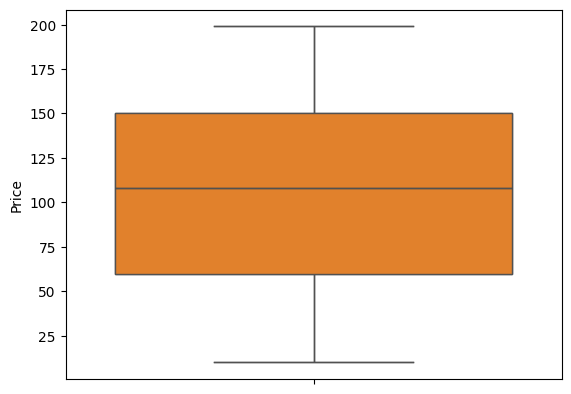

In [ ]:
upper_limit = df['Price'].mean() + 3*df['Price'].std()
lower_limit = df['Price'].mean() - 3*df['Price'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)
df.loc[(df['Price'] > upper_limit) | (df['Price'] < lower_limit)]
new_df = df.loc[(df['Price'] <= upper_limit) & (df['Price'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))
sns.boxplot(new_df['Price'])
new_df = df.copy()
new_df.loc[(new_df['Price']>=upper_limit),'Price'] = upper_limit
new_df.loc[(new_df['Price']<=lower_limit), 'Price'] = lower_limit
sns.boxplot(new_df['Price'])

IQR

before removing outliers: 1000
after removing outliers: 1000
outliers: 0


<Axes: ylabel='Price'>

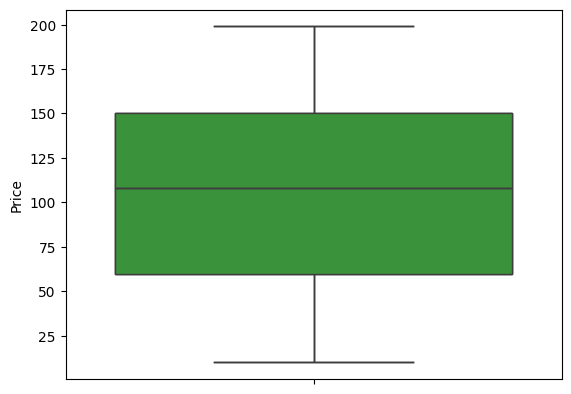

In [ ]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit
sns.boxplot(df['Price'])
df.loc[(df['Price'] > upper_limit) | (df['Price'] < lower_limit)]
new_df = df.loc[(df['Price'] <= upper_limit) & (df['Price'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))
sns.boxplot(new_df['Price'])
new_df = df.copy()
new_df.loc[(new_df['Price']>upper_limit), 'Price'] = upper_limit
new_df.loc[(new_df['Price']<lower_limit), 'Price'] = lower_limit

sns.boxplot(new_df['Price'])

Percentile

upper limit: 197.01
lower limit: 11.99
before removing outliers: 1000
after removing outliers: 980
outliers: 20


<Axes: xlabel='Price', ylabel='Price'>

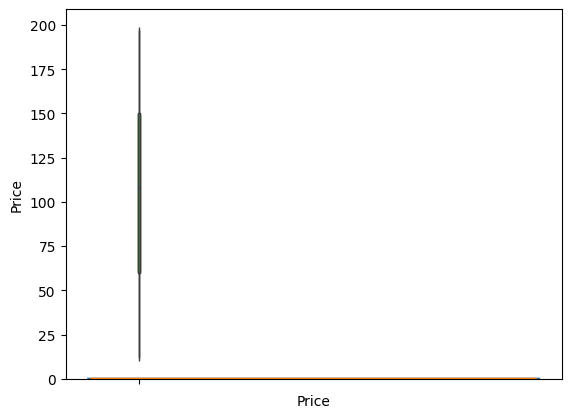

In [ ]:
upper_limit = df['Price'].quantile(0.99)
lower_limit = df['Price'].quantile(0.01)
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)
sns.boxplot(df['Price'])
df.loc[(df['Price'] > upper_limit) | (df['Price'] < lower_limit)]
new_df = df.loc[(df['Price'] <= upper_limit) & (df['Price'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))
sns.boxplot(new_df['Price'])

new_df = df.copy()
new_df.loc[(new_df['Price']>upper_limit), 'Price'] = upper_limit
new_df.loc[(new_df['Price']<lower_limit), 'Price'] = lower_limit
sns.boxplot(new_df['Price'])
sns.distplot(df['Price'])
sns.distplot(new_df['Price'])

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [ ]:
standardized_df

,Brand,Category,Color,Size,Material,Price
0,0.2,0.0,0.8,0.8,0.4,0.910053
1,0.2,0.4,0.0,0.8,0.8,0.248677
2,1.0,0.0,0.6,0.2,1.0,0.619048
3,0.4,0.6,0.4,0.2,0.0,0.354497
4,0.0,0.8,0.8,0.2,0.4,0.544974
...,...,...,...,...,...,...
995,0.6,0.4,0.0,0.0,0.6,0.878307
996,0.6,0.2,0.6,1.0,0.8,0.529101
997,0.8,0.8,0.2,0.8,0.2,0.619048
998,1.0,0.8,0.0,1.0,0.2,0.312169


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
X = df.drop(['Price'],axis=1)
X=X.drop(['Category'],axis=1)
Y = no_duplicates['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
X


# from sklearn.utils import shuffle

# # Function to perform data augmentation
# def augment_data(X, y):
#     # Augment your data here (e.g., add noise, flip, rotate, scale)
#     # Example: add Gaussian noise
#     noise = np.random.normal(0, 0.1, X.shape)
#     X_augmented = X + noise
#     return X_augmented, y

# # Augment the original data
# X_train_augmented, y_train_augmented = augment_data(X_train, Y_train)

# # Combine augmented data with original data
# X_train_combined = np.vstack((X_train, X_train_augmented))
# y_train_combined = np.concatenate((Y_train, y_train_augmented))

# # Shuffle the combined data
# X_train, Y_train = shuffle(X_train_combined, y_train_combined, random_state=42)

,Brand,Color,Size,Material
0,1.0,4.0,4.0,2.0
1,1.0,0.0,4.0,4.0
2,5.0,3.0,1.0,5.0
3,2.0,2.0,1.0,0.0
4,0.0,4.0,1.0,2.0
...,...,...,...,...
995,3.0,0.0,0.0,3.0
996,3.0,3.0,5.0,4.0
997,4.0,1.0,4.0,1.0
998,5.0,0.0,5.0,1.0


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, Y_train, Y_test are already defined

# Initialize the DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 5999.266388888889


In [ ]:
#finding the root square value
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared (R2) Score:", r2)


Mean Squared Error: 5999.266388888889
Root Mean Squared Error: 77.45493134003083
R-squared (R2) Score: -1.1088269634435712


In [ ]:
# tunning the model using best hyperparameters(grid search)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Maximum number of features to consider for each split
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
Y_pred_tuned = best_model.predict(X_test)

# Evaluate the model using mean squared error
mse_tuned = mean_squared_error(Y_test, Y_pred_tuned)
print("Mean Squared Error (Tuned):", mse_tuned)

# Calculate R-squared (R2) score for the tuned model
r2_tuned = r2_score(Y_test, Y_pred_tuned)
print("R-squared (R2) Score (Tuned):", r2_tuned)


Best Hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean Squared Error (Tuned): 3111.1050810418906
R-squared (R2) Score (Tuned): -0.09359742603837673


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

# Define the expanded hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 8, 16],  # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Maximum number of features to consider for each split
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0]  # Complexity parameter used for Minimal Cost-Complexity Pruning
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate RMSE for the best model
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error (RMSE) for Best Model:", rmse)

# Calculate R2 score for the best model
r2 = r2_score(Y_test, Y_pred)
print("R-squared (R2) Score for Best Model:", r2)


Best Hyperparameters: {'ccp_alpha': 1.0, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 2}
Root Mean Squared Error (RMSE) for Best Model: 55.234615381873226
R-squared (R2) Score for Best Model: -0.07242139008304127


Feature ranking:
1. feature 0 (0.338314)
2. feature 3 (0.239449)
3. feature 1 (0.228282)
4. feature 2 (0.193956)


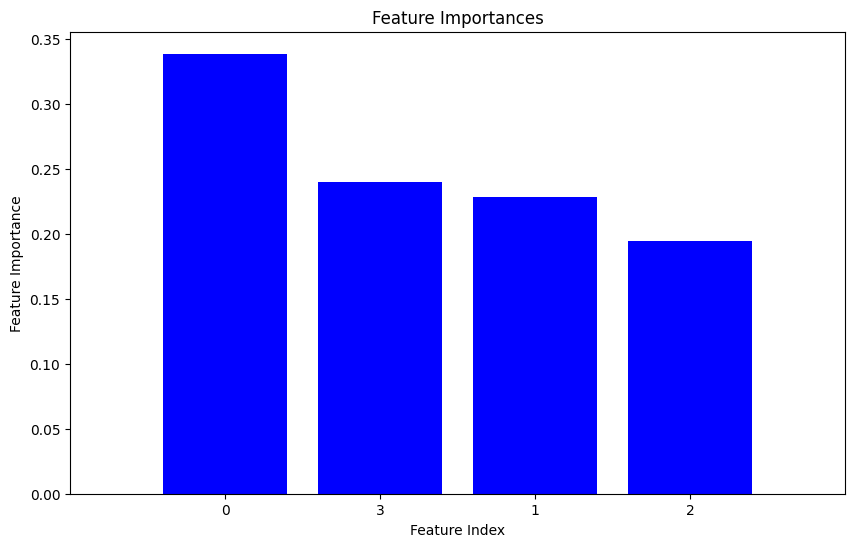

In [ ]:
# feature importance
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Assuming X_train and Y_train are your training features and target variable
# Assuming X_test and Y_test are your testing features and target variable

# Initialize the DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model
model.fit(X_train, Y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.show()


**Linear Regression**

R squared Error :  0.0010618500835934963


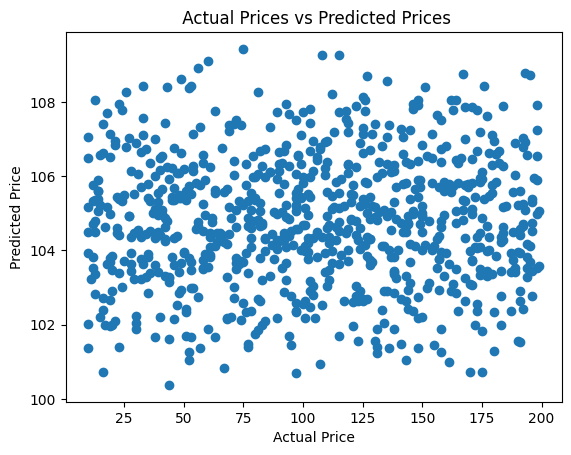

In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)
training_data_prediction = lin_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

R squared Error :  -0.019269247744203577


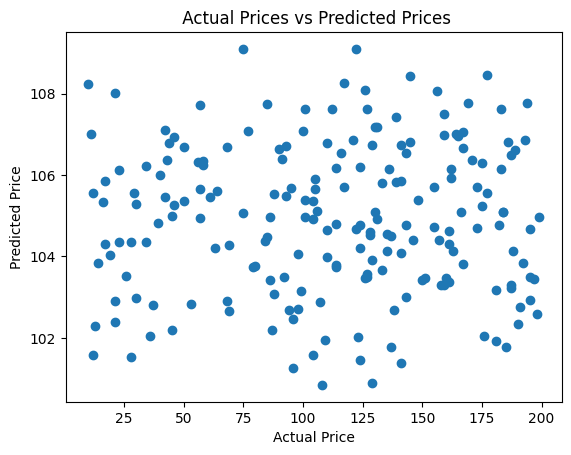

In [ ]:
test_data_prediction = lin_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

**Lasso Regression**

R squared Error :  0.0006716664284874829


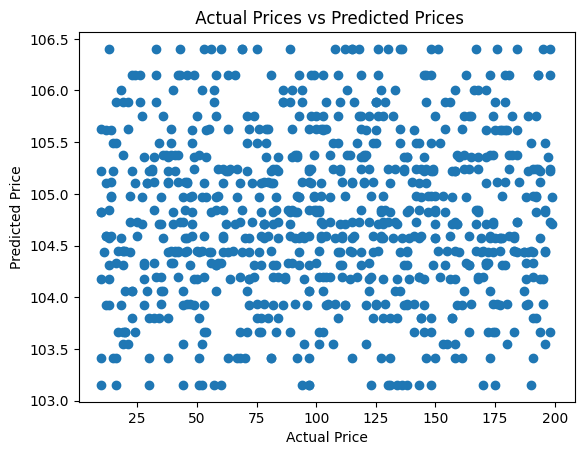

In [ ]:
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,Y_train)
training_data_prediction = lass_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

R squared Error :  -0.01859689818326915


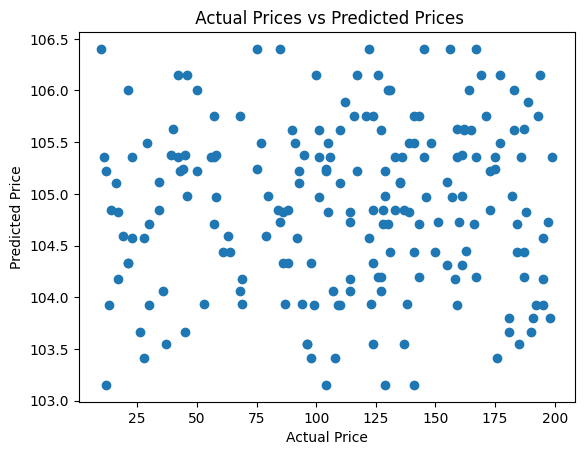

In [ ]:
test_data_prediction = lass_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

##Support Vector Classifier

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
viewer_mode = False
if viewer_mode:
  print("Support Vector Classifier takes very long.")
else:
  C = 1.0  # SVM regularization parameter
  models = (svm.SVC(kernel='linear', C=C),
            svm.SVC(kernel='rbf', gamma=0.7, C=C),
            svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))


  accuracy_svc = []
  for clf in models:
      clf.fit(X_train, Y_train)
      y_pred = clf.predict(X_test)
      accuracy_svc.append(accuracy_score(Y_test, y_pred))
      print(f"Accuracy: ",  accuracy_score(Y_test, y_pred))

Accuracy:  0.01
Accuracy:  0.0
Accuracy:  0.01


Accuracy = 0.01
Sensitivity (TPR) = 0.0
Support Vector Classifier with highest accuracy: Linear

 Confusion matrix 
 



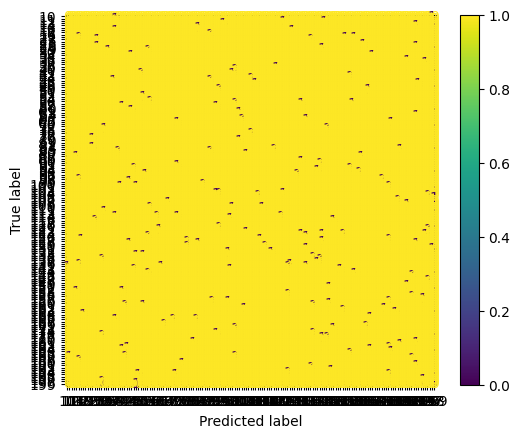

In [ ]:
if viewer_mode:
  max_accuracy_svc=0.734126
  true_positive_svc=0.660243
  print('Support Vector Classifier with highest accuracy: Polynomial')
  print('Accuracy =', max_accuracy_svc)
  print('Sensitivity (TPR) =', true_positive_svc)
else:
  svc_clf_list = ['Linear', 'Radial Basis Function', 'Polynomial']

  max_accuracy_svc = max(accuracy_svc)
  max_svc_index = np.argmax(accuracy_svc)

  svc_clf = models[max_svc_index]
  svc_clf.fit(X_train, Y_train)
  y_predict = svc_clf.predict(X_test)
  svc_report = classification_report(Y_test, y_predict)

  cm_svc = confusion_matrix(Y_test, y_predict)

  true_positive_svc = cm_svc[1][1]/sum(Y_test)

  print('Accuracy =', max_accuracy_svc)
  print('Sensitivity (TPR) =', true_positive_svc)
  print('Support Vector Classifier with highest accuracy:', svc_clf_list[max_svc_index])

  print('\n Confusion matrix \n \n')
  # from sklearn.metrics import plot_confusion_matrix
  from sklearn.metrics import ConfusionMatrixDisplay
  ConfusionMatrixDisplay.from_estimator(clf,X_test,Y_test)
  # plot_confusion_matrix(svc_clf, X_test, Y_test)
  # plt.show()

**Neural Network**

7/7 [==============================] - 0s 2ms/step


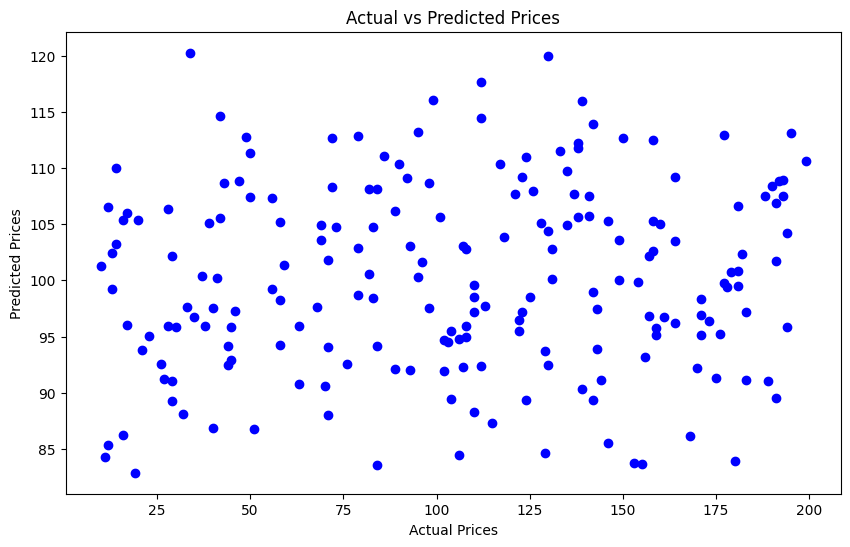

,Epochs,Learning Rate,Test Loss
0,50,0.001000,3032.616455
1,50,0.010000,2914.613525
2,50,0.100000,3102.759766
3,100,0.001000,2956.109619
4,100,0.010000,2897.007812
5,100,0.100000,2944.245850
6,150,0.001000,2937.235107
7,150,0.010000,2958.713135
8,150,0.100000,2981.948975


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming df contains your data
X = df.drop(columns=['Price'])
y = df['Price']

# Splitting the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Changing our epochs and learning rates
epochs_list = [50, 100, 150]
learning_rates = [0.001, 0.01, 0.1]

results = []

# Iterate over different combinations of hyperparameters
for epochs in epochs_list:
    for lr in learning_rates:
        # Building the neural network model
        model = Sequential([
            Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            Dense(64, activation='relu'),
            Dense(1)
        ])

        # Compiling the model
        optimizer = Adam(learning_rate=lr)  # Updated here
        model.compile(optimizer=optimizer, loss='mean_squared_error')

        # Training the model
        history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=0)

        # Evaluating the model
        loss = model.evaluate(X_test_scaled, y_test)

        results.append({
            'Epochs': epochs,
            'Learning Rate': lr,
            'Test Loss': loss
        })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Highlighting the best result
best_result_idx = results_df['Test Loss'].idxmin()
best_result = results_df.loc[best_result_idx]
results_df_style = results_df.style.apply(lambda x: ['background: lightgreen' if x.name == best_result_idx else '' for _ in x], axis=1)

# Plotting actual vs predicted for the best model
best_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
best_model.compile(optimizer=Adam(learning_rate=best_result['Learning Rate']), loss='mean_squared_error')  # Updated here
best_model.fit(X_train_scaled, y_train, epochs=int(best_result['Epochs']), batch_size=32, validation_data=(X_val_scaled, y_val), verbose=0)

y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

results_df_style


In [ ]:
import pickle

pickle.dump(lin_reg_model, open('cloth.pkl', 'wb'))

import joblib

# Assuming encoder is your OrdinalEncoder object
joblib.dump(encoder, 'encoder.pkl')